* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

1) Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import colors



iris = load_iris()

#print(iris.DESCR)

In [2]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


2) Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [3]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['variety'])

In [4]:
data1.head(200)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
data2 = data1[['sepal length (cm)' , 'sepal width (cm)', 'variety']]
data2.head(10)

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
5,5.4,3.9,0.0
6,4.6,3.4,0.0
7,5.0,3.4,0.0
8,4.4,2.9,0.0
9,4.9,3.1,0.0


3) Разделите данные на выборку для обучения и тестирования

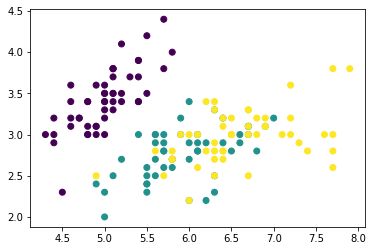

In [6]:
plt.scatter(data2['sepal length (cm)'], data2['sepal width (cm)'], c=data2['variety'])
plt.show()

In [7]:
data_class = data2.variety
data_class

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, data_class, test_size=0.25, random_state=42)


4) Постройте модель LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
lda = LinearDiscriminantAnalysis()

In [11]:
#lda.fit?

In [12]:
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [13]:
lda.predict(X_test)

array([1., 0., 2., 1., 2., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 2., 2.,
       1., 1., 2., 0., 1., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 0.,
       0., 2., 2., 0.])

In [14]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

5) Визуализируйте предсказания для тестовой выборки и центры классов

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colors


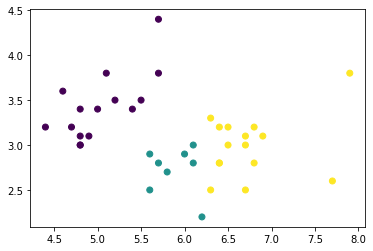

In [16]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.show()


In [17]:
# посмотрим на наши центроиды
lda.means_

array([[4.99714286, 3.42857143, 0.        ],
       [5.88717949, 2.75128205, 1.        ],
       [6.53947368, 2.97894737, 2.        ]])

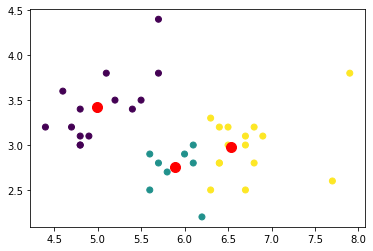

In [18]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=400, marker='.')

plt.show()

6) Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [19]:
data3 = data2[['sepal length (cm)' , 'sepal width (cm)']]
data3.head(10)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


7) Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#StandardScaler?

In [22]:
scaler = StandardScaler()

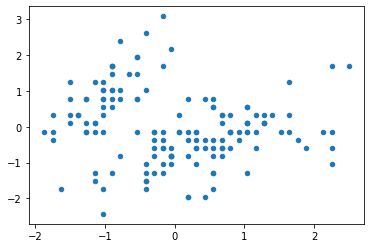

In [23]:
X_scaled = scaler.fit_transform(data3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=20)

In [24]:
from sklearn.cluster import KMeans

In [25]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

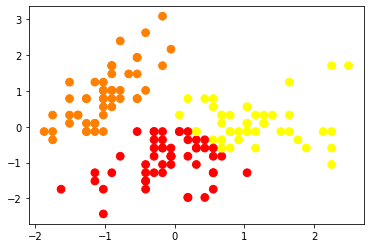

In [26]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


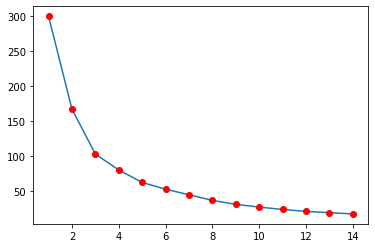

In [27]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

plt.show()

По графику получается 3 или 4 кластера по методу локтя